In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#Exploratory Data Analysis (EDA)
df.shape

(8425, 23)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [134]:
df.nunique()


Location          12
MinTemp          286
MaxTemp          332
Rainfall         250
Evaporation      117
Sunshine         141
WindGustDir       16
WindGustSpeed     53
WindDir9am        16
WindDir3pm        16
WindSpeed9am      35
WindSpeed3pm      36
Humidity9am       91
Humidity3pm       95
Pressure9am      385
Pressure3pm      375
Cloud9am          10
Cloud3pm          10
Temp9am          305
Temp3pm          329
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

In [9]:
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

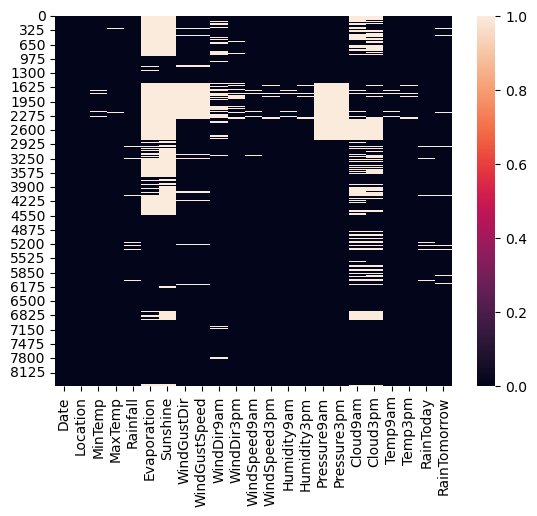

In [10]:
sns.heatmap(df.isnull())


In [15]:
#We can clearly see from the dataset that apart from the date and location we have null values in almost all of the features and also the target values.

In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print('                                                ')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
                                                
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
                                                
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
                                                
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
                      

In [17]:
#target variable rain tomorrow is imbalanced, will use SMOTE later

In [18]:
#Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [19]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year
df.drop(columns=['Date'],axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [26]:
#Treating the Null Values by Imputation use mean ,mode ,mediun
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [27]:
df.isnull().sum()


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

<AxesSubplot:>

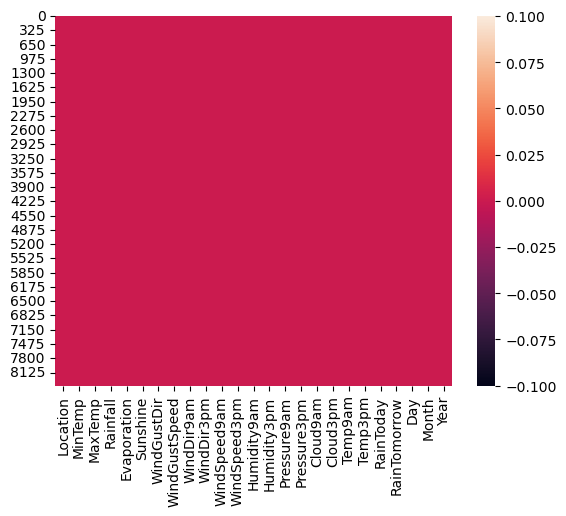

In [29]:
sns.heatmap(df.isnull())
#we have successfully treated all the null values and we dont have any null values in the dataset

In [31]:
#Statistical Overview of the Dataset
df.describe()
#summary of this dataset looks perfect since there is no negative/ invalid values present.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


In [33]:
#Visualization
#Checking the categorical columns and numerical columns
#checking categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [34]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


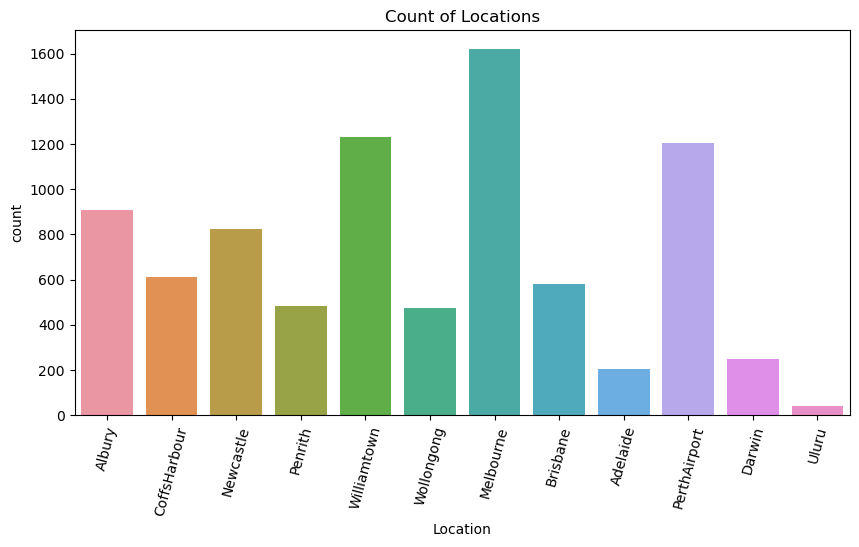

In [35]:
#Univariate Analysis of the categorical columns
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

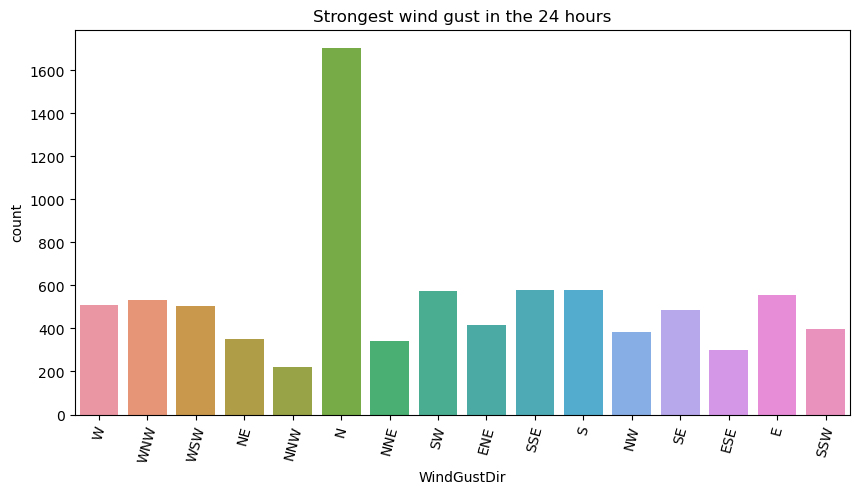

In [36]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()


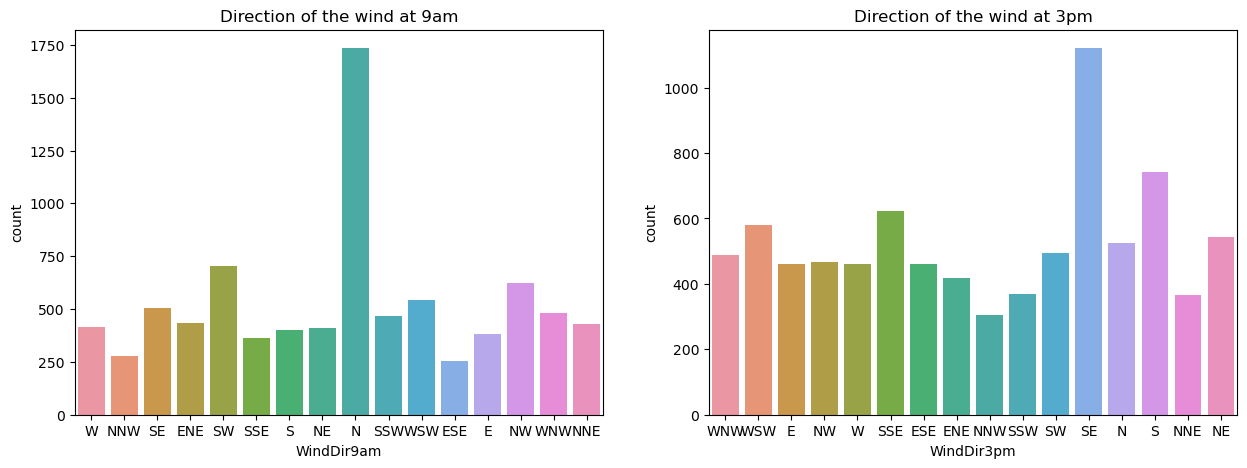

In [37]:
#Visualization of wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

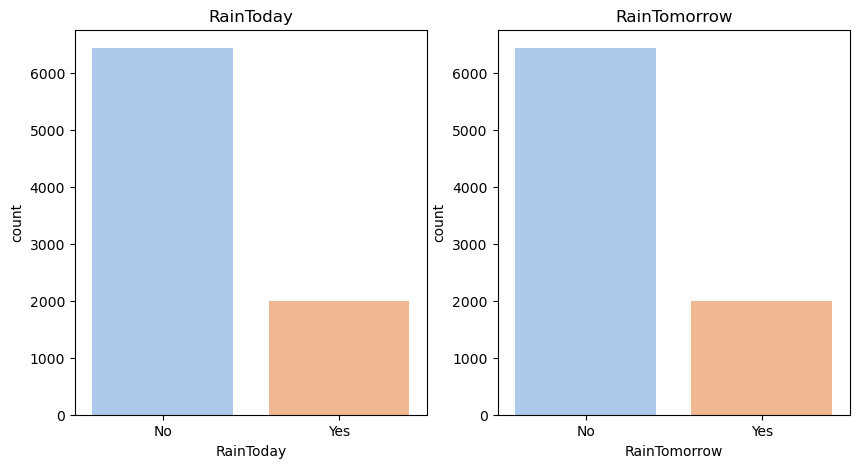

In [38]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

In [39]:
#Visualizing the distribution of the numerical columns
len(num_col)

19

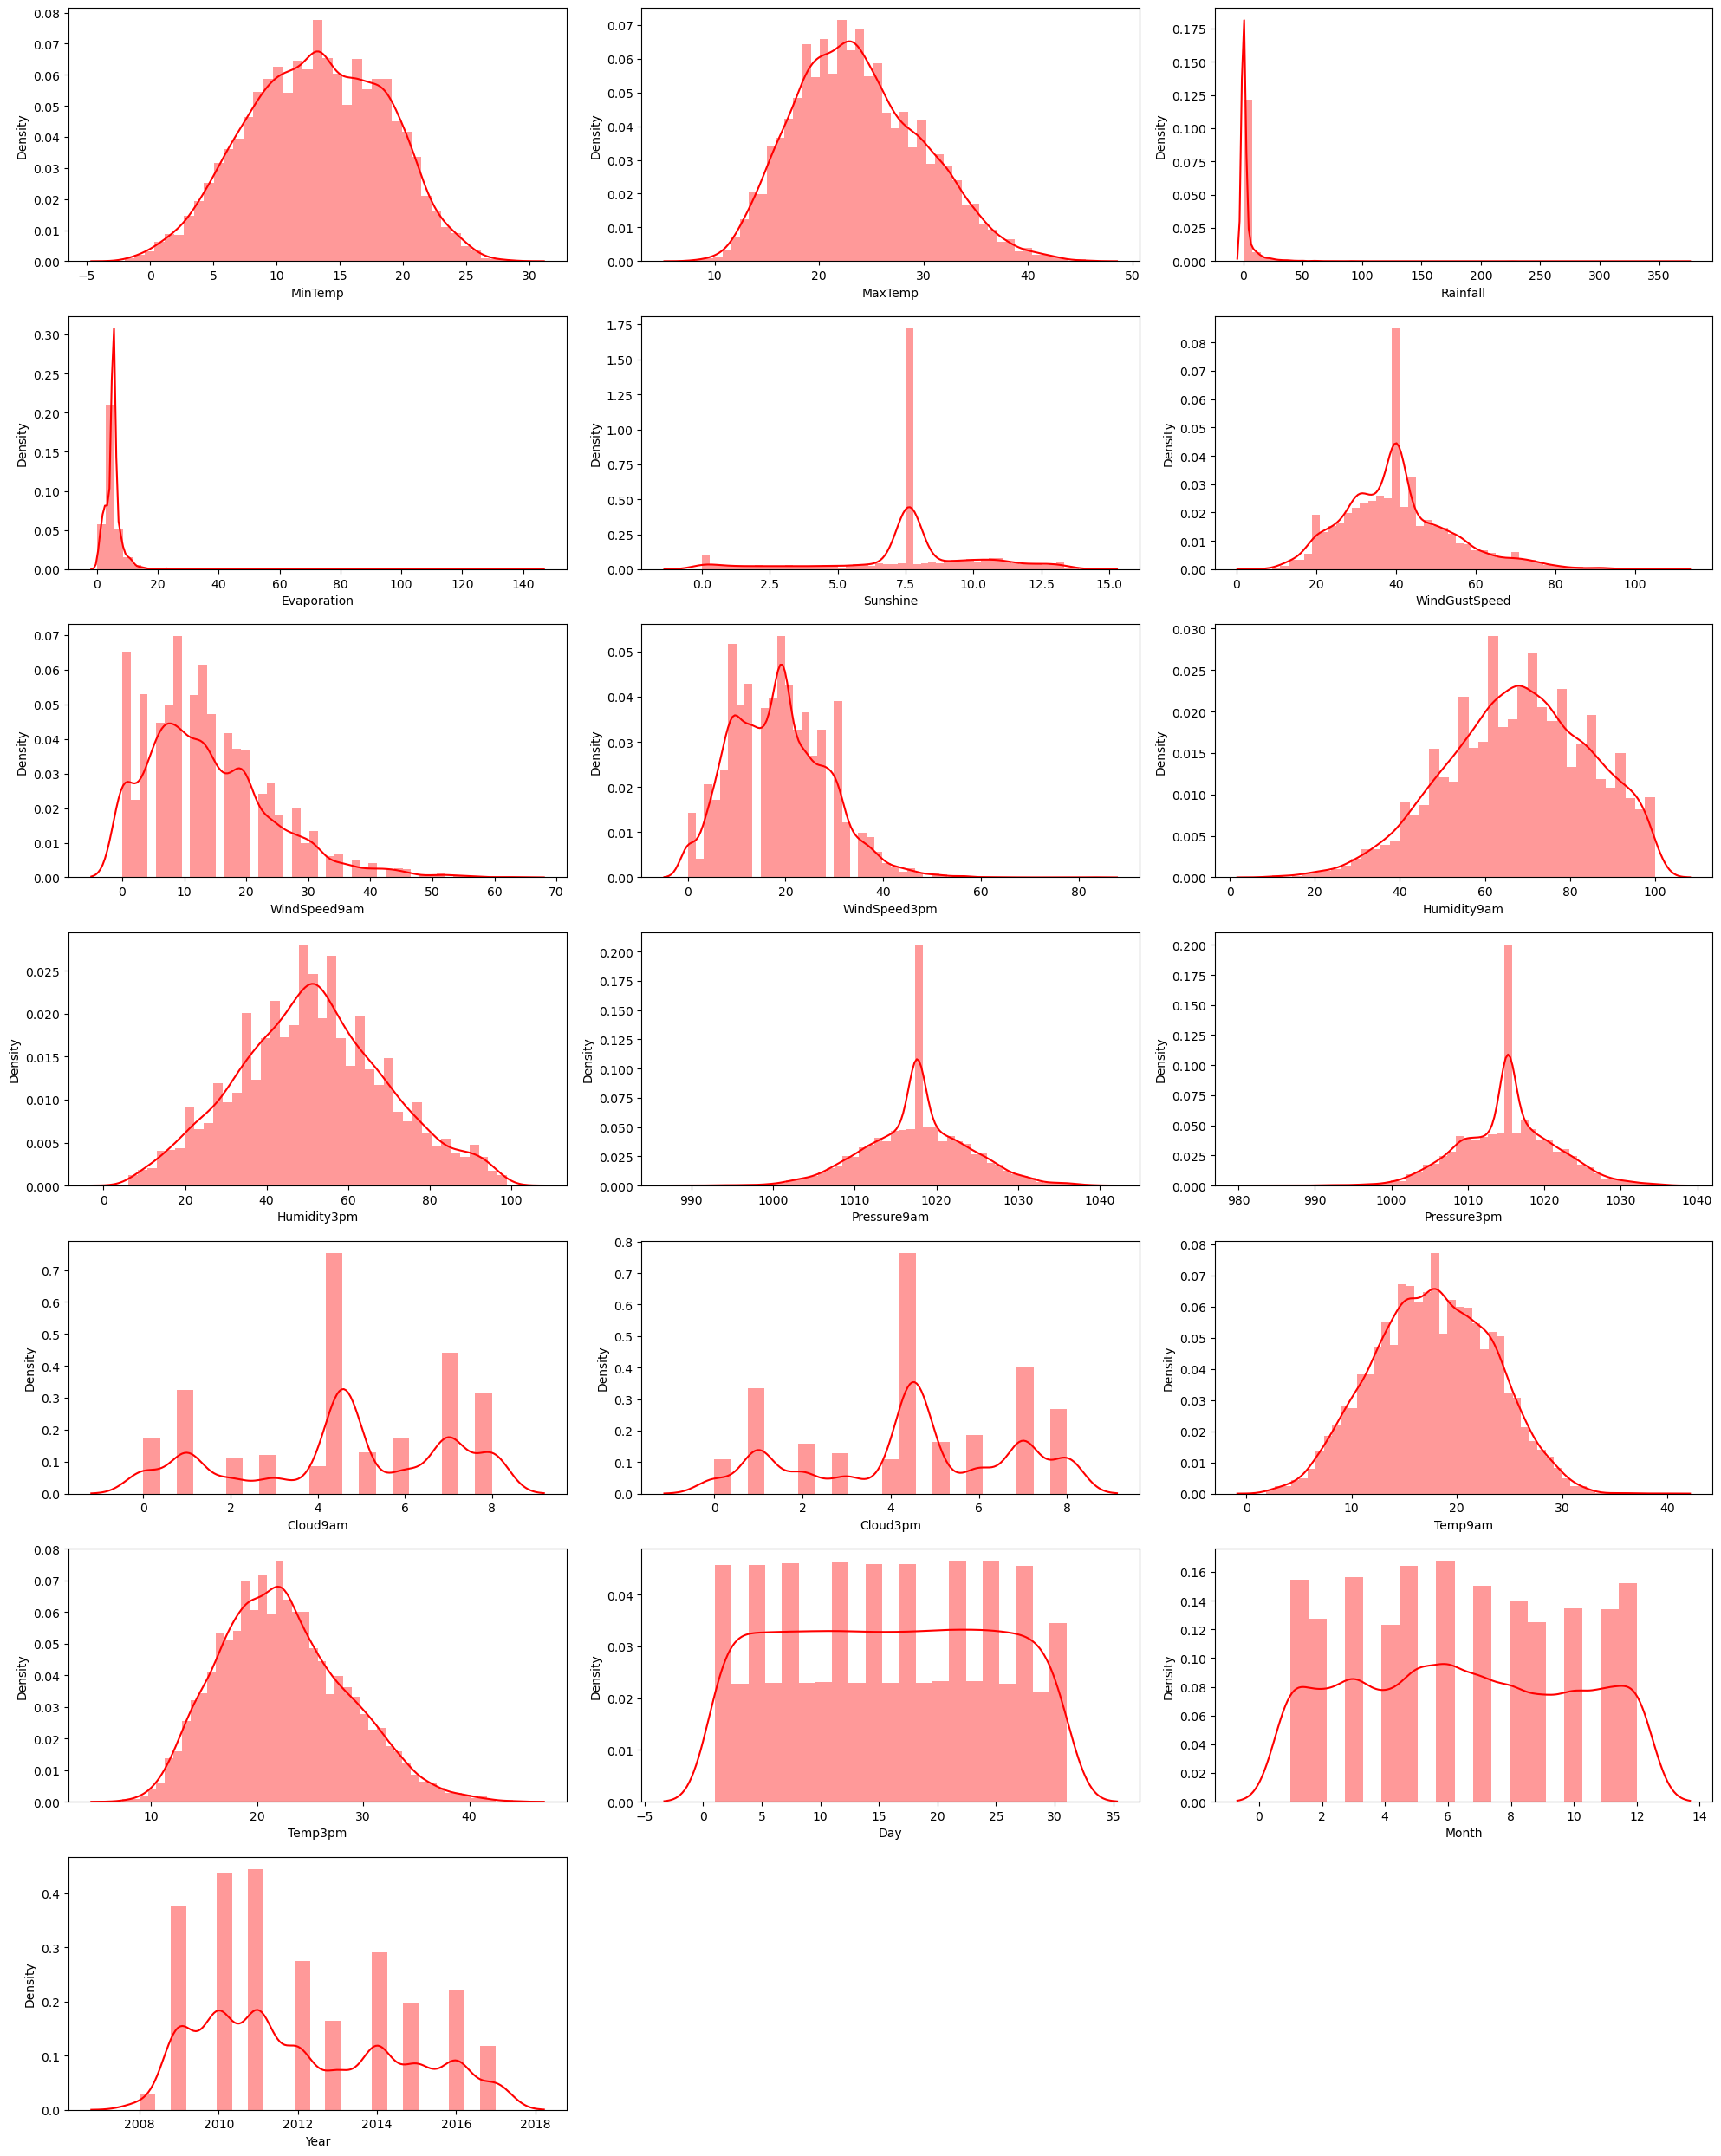

In [41]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="r")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [42]:
'''dataset is not normally distributed.

Min Temp is normally distributed

Max Temp is slightly skewed right

Rainfall is skewed right

Evaporation is skewed right

Sunshine is not normally distributed

WindGustSpeed, WindSpeed9am,WindSpeed3pm is skewed right

Humidity9am is slightly skewed left and Humidity3pm is normally distributed.

Pressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is
not distributed normally'''

'dataset is not normally distributed.\n\nMin Temp is normally distributed\n\nMax Temp is slightly skewed right\n\nRainfall is skewed right\n\nEvaporation is skewed right\n\nSunshine is not normally distributed\n\nWindGustSpeed, WindSpeed9am,WindSpeed3pm is skewed right\n\nHumidity9am is slightly skewed left and Humidity3pm is normally distributed.\n\nPressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is\nnot distributed normally'

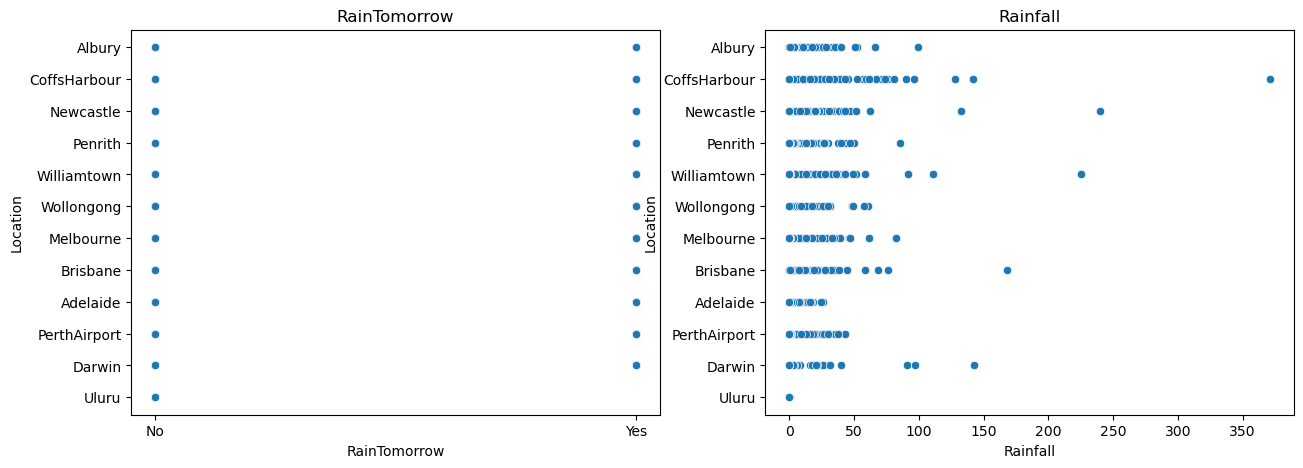

In [43]:
#Bivariate Analysis
#Checking the relation between the features and the two targerts we have

#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

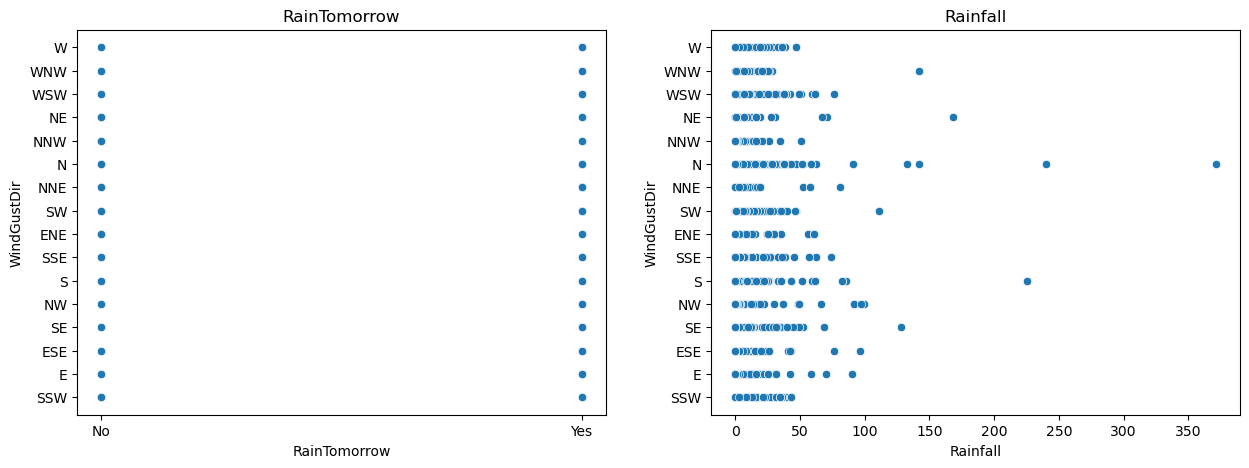

In [44]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

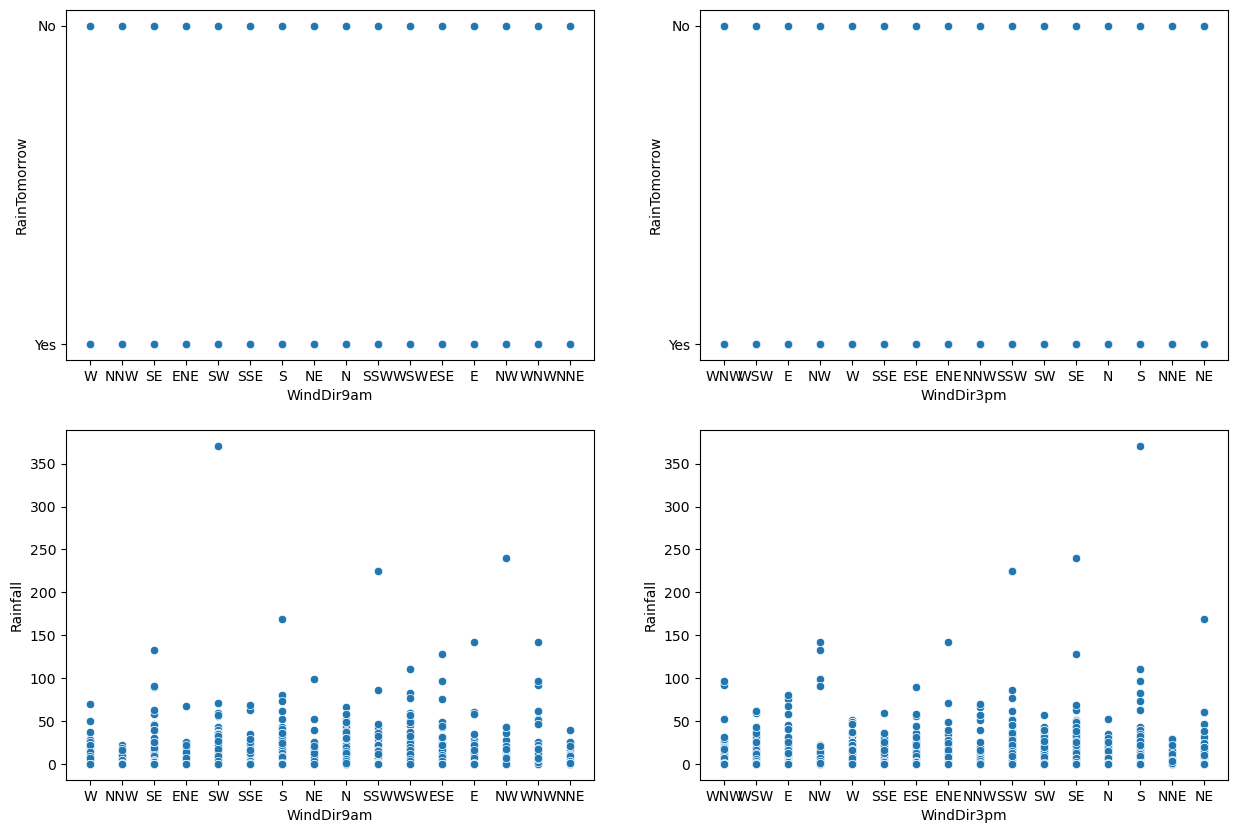

In [46]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)
#We donot see any linear relation either

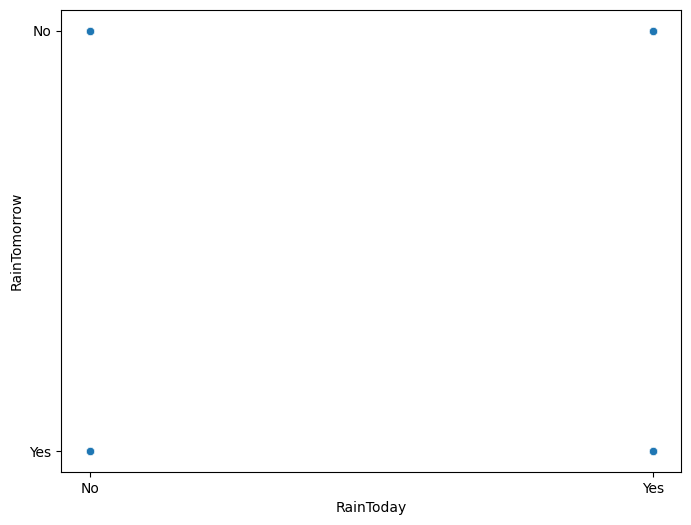

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()
#There is no relation that we can see.

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

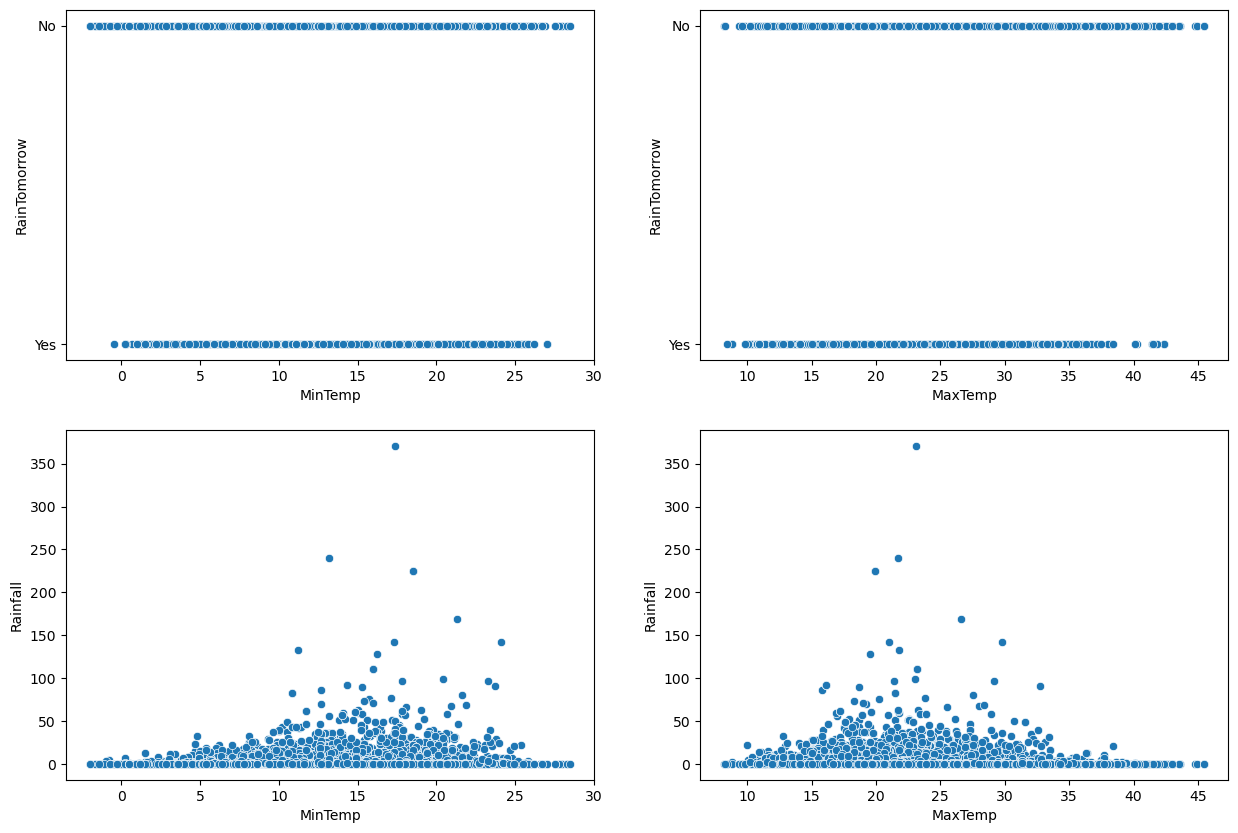

In [50]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)
#there is no linear relation of max temp and min temp with both the targets

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

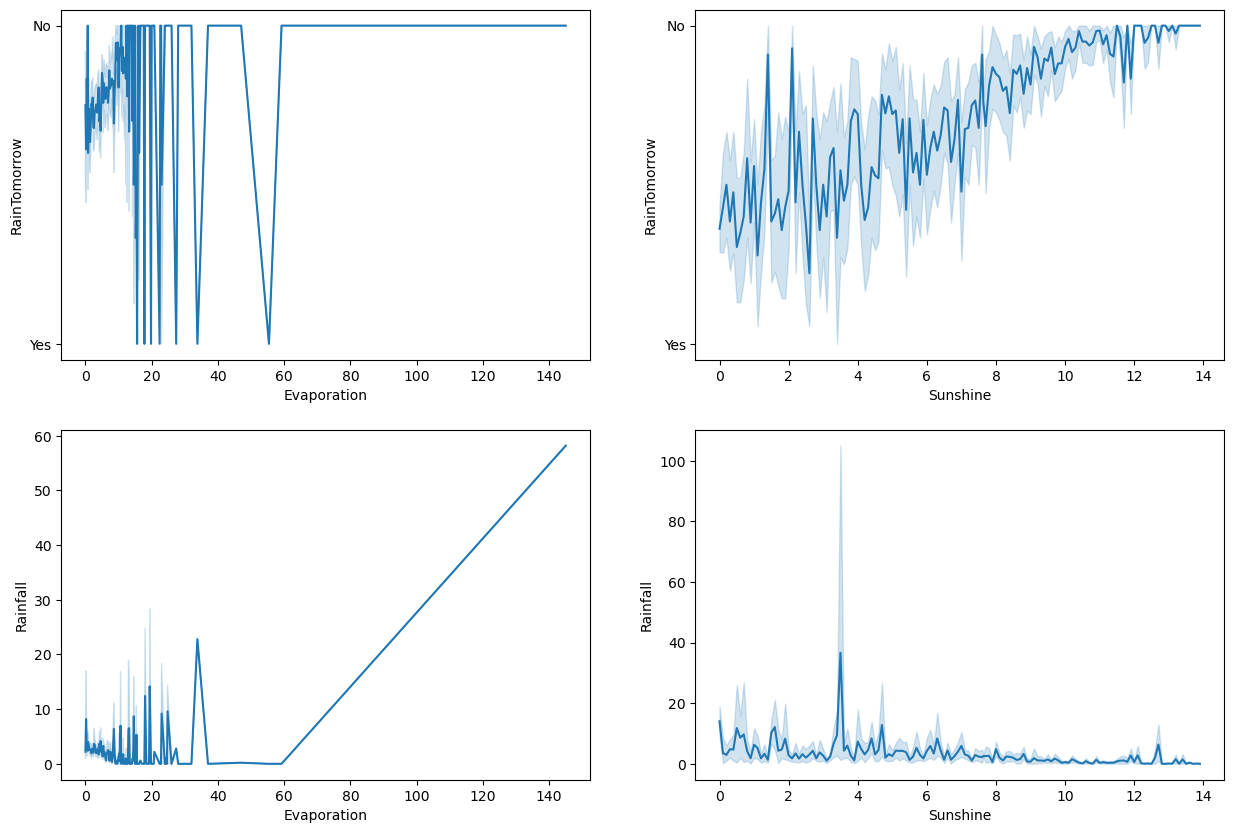

In [52]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)
#there is  relation in the graphs

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

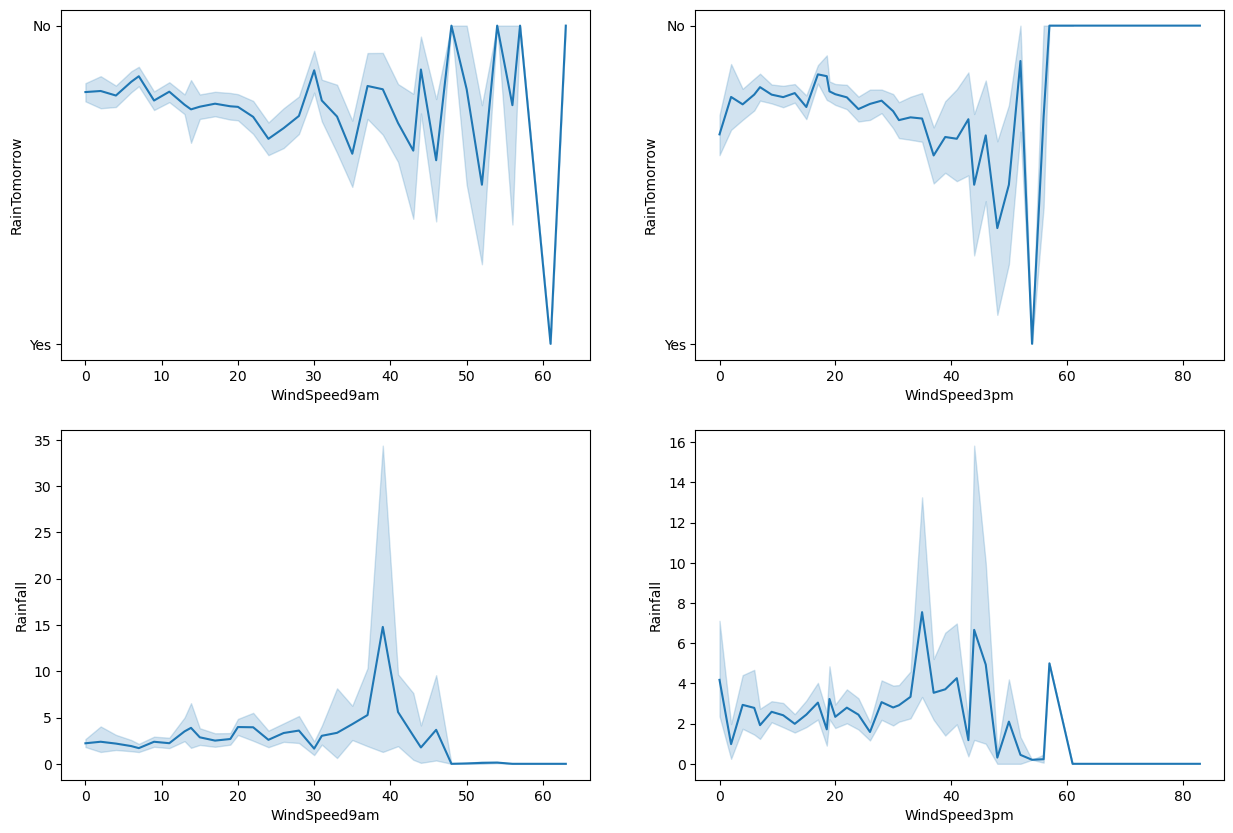

In [53]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)
#There is no linear relaion seen



<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

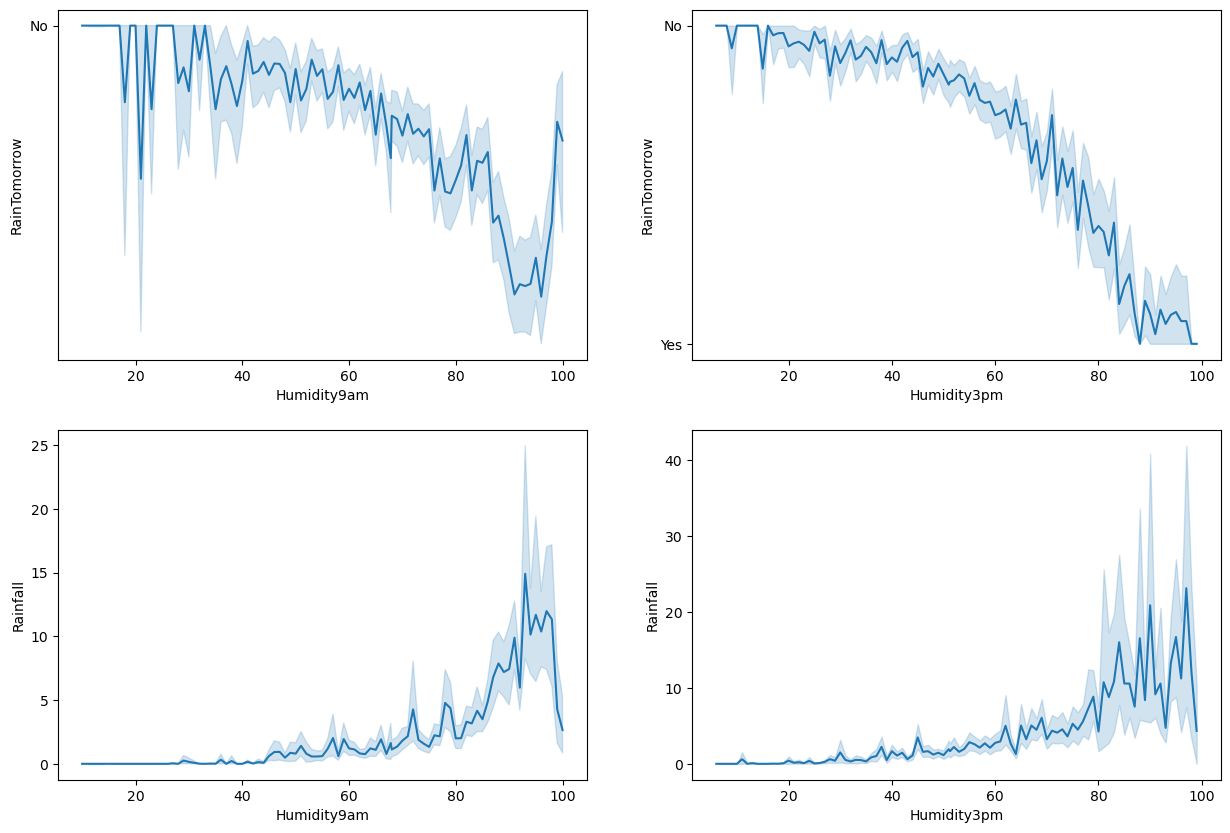

In [54]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)
# there is  inverse relation in humidity with rain tomorrow and positive relation between humidity and Rainfall

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

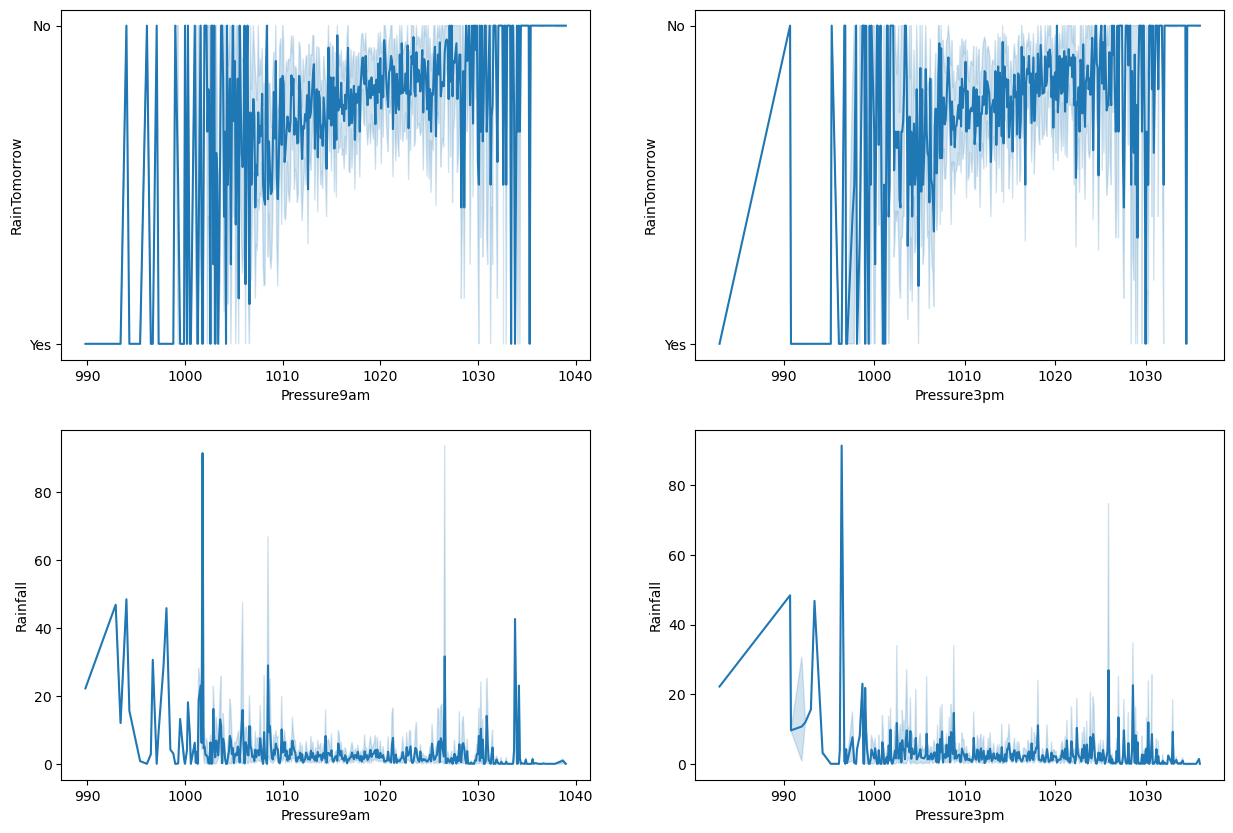

In [55]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)
#dont see an linear relation

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

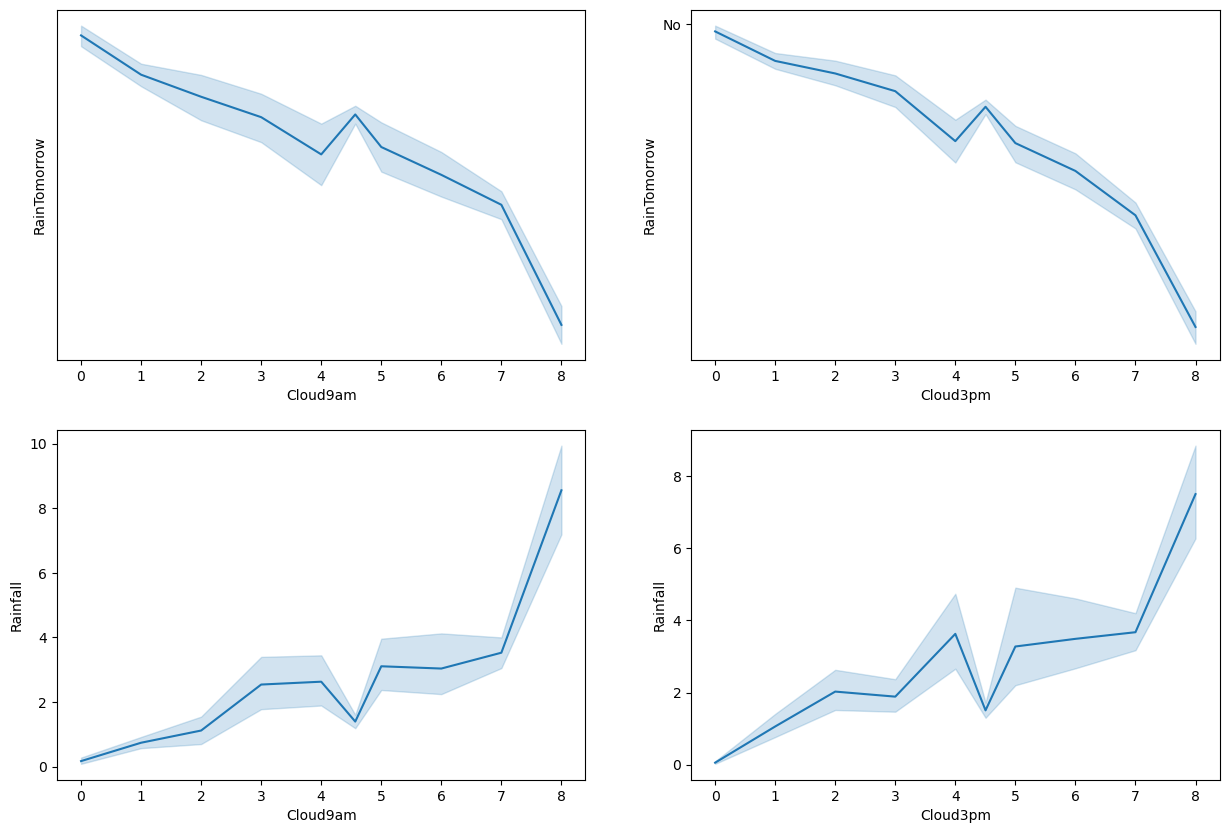

In [57]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)
# linear relationship, and inverse relation between could and rain tomorrow and a positive relation between could and rainfall.

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

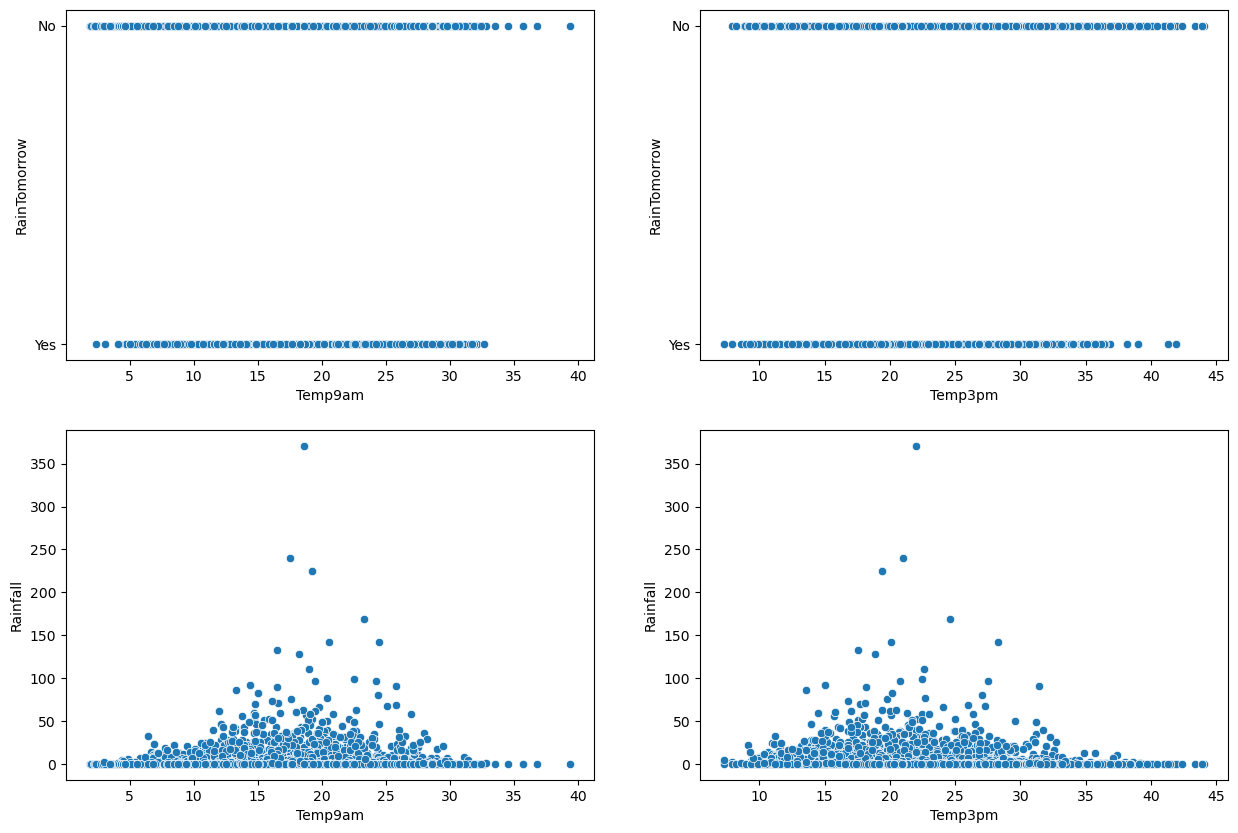

In [58]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)
#There is no linear relation that is seen in these plots.



<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

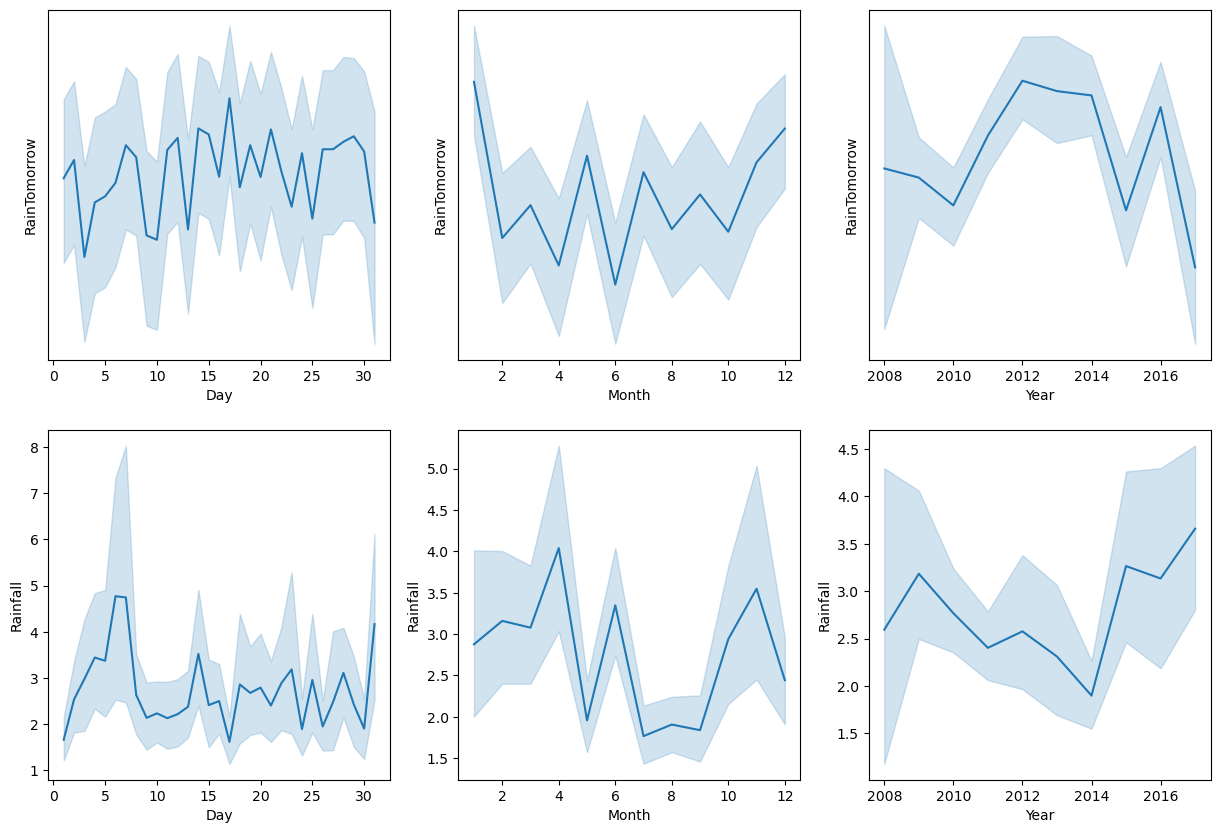

In [60]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=df)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=df)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=df)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=df)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=df)
#that there is no linear relationship.

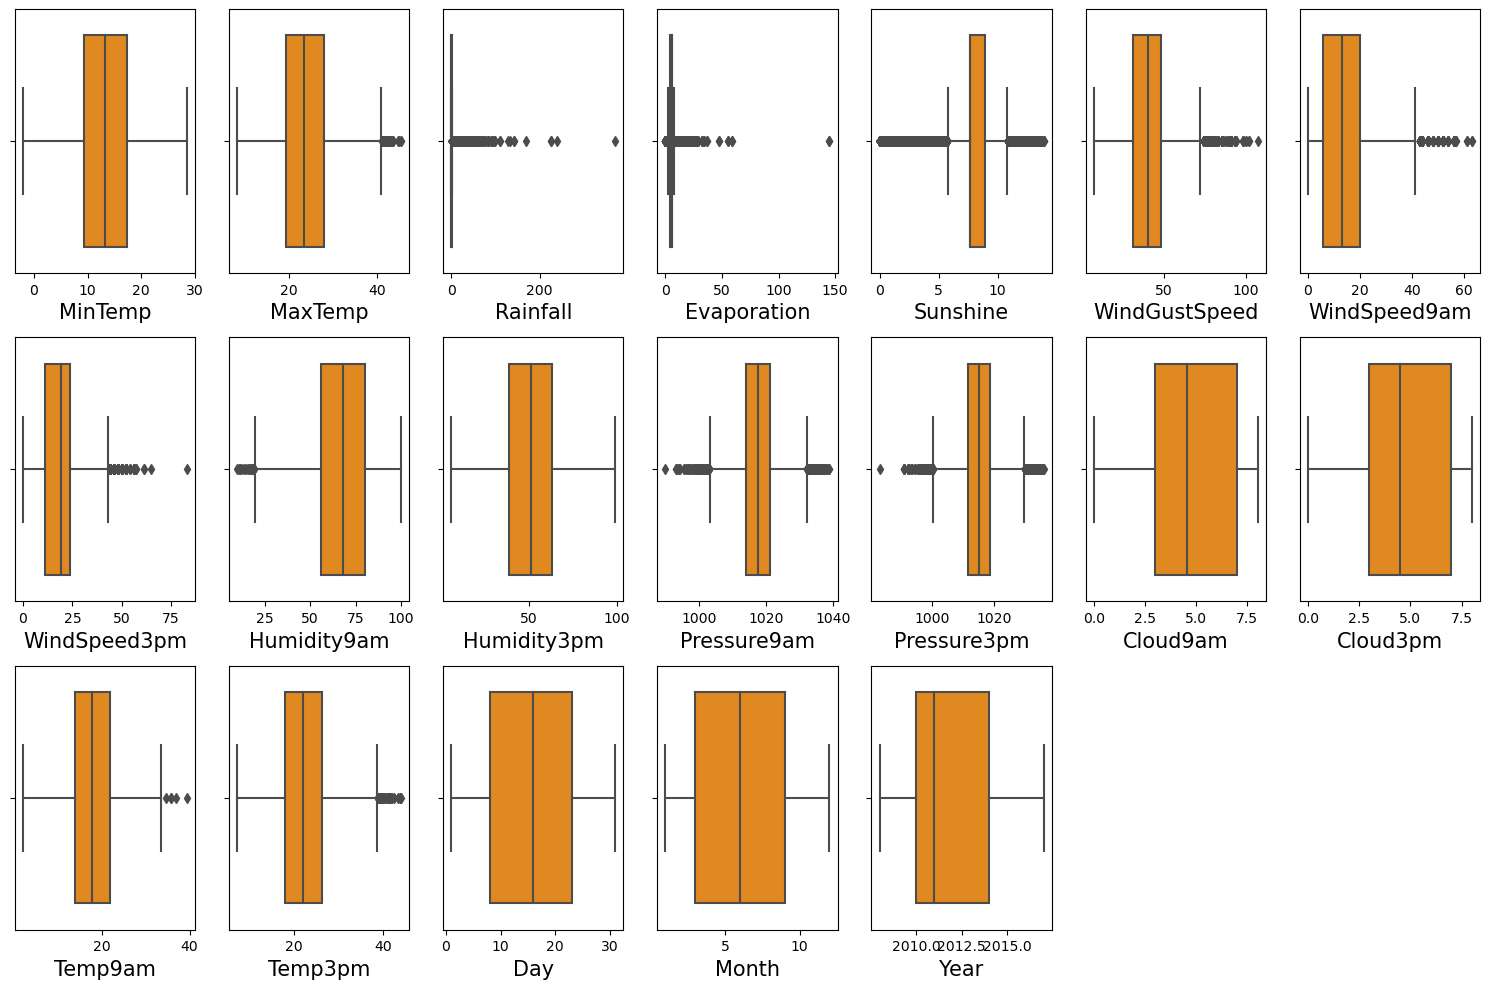

In [62]:
#Identifying the Outliers
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
#feaving outliers

In [63]:
#Removing Outliers
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [67]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]


z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [68]:
#This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [70]:
#Checking the skewness of the dataset
new_df.skew().sort_values()
# Here we have removed the outliers whose Zscore is less than 3.

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

In [71]:
#Checking the skewness of the dataset
new_df.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

In [72]:
#Removing skewness using log transformation
new_df["Sunshine"] = np.log1p(new_df["Sunshine"])
new_df["Rainfall"] = np.log1p(new_df["Rainfall"])
new_df["Evaporation"] = np.log1p(new_df["Evaporation"])
new_df["WindSpeed9am"] = np.log1p(new_df["WindSpeed9am"])
new_df["WindGustSpeed"] = np.log1p(new_df["WindGustSpeed"])
#checking skewness again
new_df.skew().sort_values()
#We can here see that we have successfully removed all the outliers



Sunshine        -2.460672
WindSpeed9am    -1.186810
Evaporation     -0.993594
WindGustSpeed   -0.526267
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
Rainfall         1.811941
dtype: float64

In [73]:
#Encoding the categorical columns
le=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(le.fit_transform)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,2.1555,0,3.465736,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,2.1555,6,3.135494,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,2.1555,3,3.637586,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,2.1555,9,3.367296,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


In [75]:
#we have converted the categorical columns into numerical columns using label encoding method.
#Checking the corelation between feature and label
cor =new_df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.013354,0.123801,0.068152,-0.037707,0.263202,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.080984,0.355551,0.008673,-0.154935,0.262663,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.206494,0.458312,0.316812,-0.237955,0.163935,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.013354,0.080984,-0.206494,1.000000,-0.151081,-0.189936,0.116389,0.086445,0.148138,0.103933,...,-0.034828,0.278194,0.240747,-0.076736,-0.215864,0.902769,0.317142,-0.016476,-0.005666,0.002860
Evaporation,0.123801,0.355551,0.458312,-0.151081,1.000000,0.349285,-0.116103,0.154434,-0.096182,-0.039583,...,-0.269095,-0.101440,-0.137281,0.424506,0.446336,-0.166170,-0.087821,0.009767,-0.047647,0.148225
Sunshine,0.068152,0.008673,0.316812,-0.189936,0.349285,1.000000,-0.073069,0.002758,-0.054298,-0.049383,...,-0.035891,-0.438407,-0.460418,0.182254,0.332749,-0.187463,-0.293951,-0.000143,-0.001379,0.115062
WindGustDir,-0.037707,-0.154935,-0.237955,0.116389,-0.116103,-0.073069,1.000000,-0.002519,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.263202,0.262663,0.163935,0.086445,0.154434,0.002758,-0.002519,1.000000,-0.059409,0.086693,...,-0.322502,0.001923,0.053528,0.237165,0.130016,0.075067,0.161878,-0.005867,0.048639,-0.014468
WindDir9am,-0.041030,-0.045231,-0.217160,0.148138,-0.096182,-0.054298,0.405681,-0.059409,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.103933,-0.039583,-0.049383,0.507292,0.086693,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


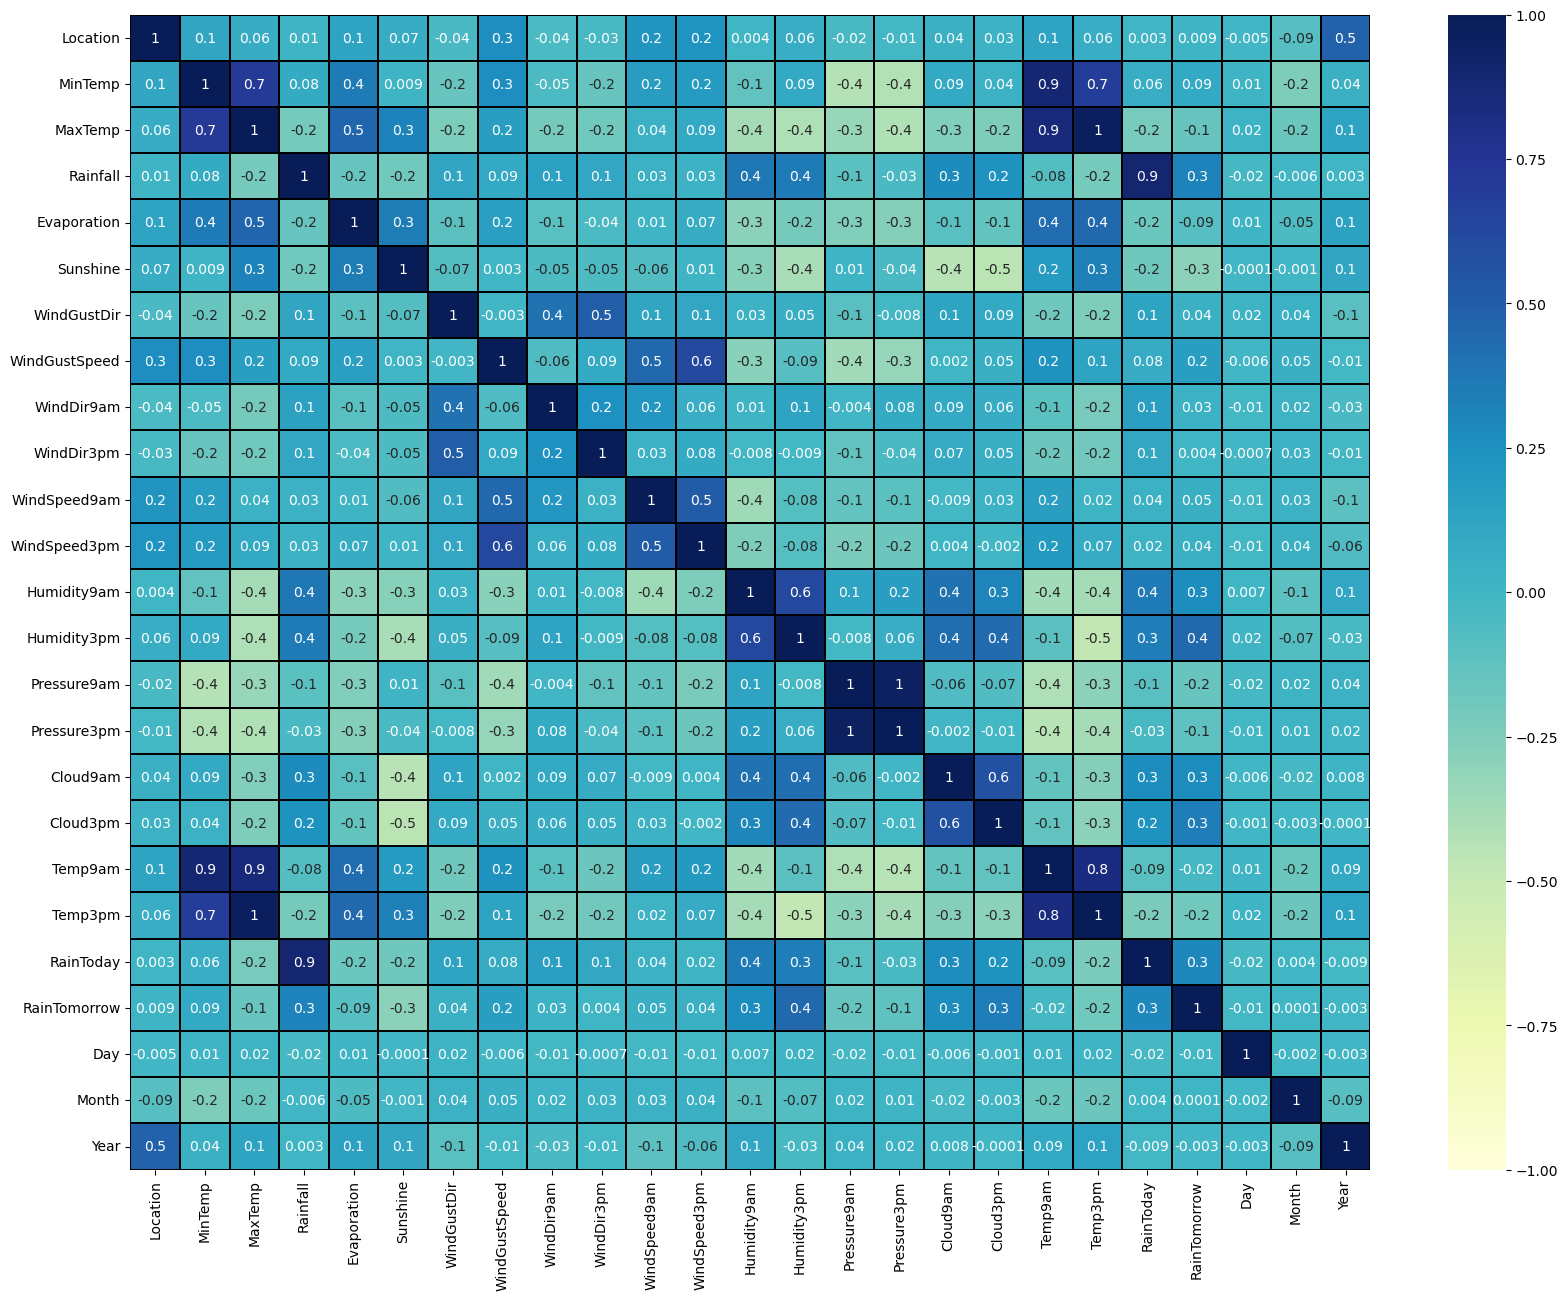

In [76]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [78]:
cor['RainTomorrow'].sort_values(ascending=False)
#Here we can clearly see that humidy has the highest corelation with raintomorrow



RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.317142
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.161878
MinTemp          0.091021
WindSpeed9am     0.048750
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.087821
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.293951
Name: RainTomorrow, dtype: float64

In [80]:
cor['Rainfall'].sort_values(ascending=False)
# Rain today has highest relation with Rainfall

Rainfall         1.000000
RainToday        0.902769
Humidity9am      0.374141
Humidity3pm      0.357797
RainTomorrow     0.317142
Cloud9am         0.278194
Cloud3pm         0.240747
WindDir9am       0.148138
WindGustDir      0.116389
WindDir3pm       0.103933
WindGustSpeed    0.086445
MinTemp          0.080984
WindSpeed9am     0.032173
WindSpeed3pm     0.026797
Location         0.013354
Year             0.002860
Month           -0.005666
Day             -0.016476
Pressure3pm     -0.034828
Temp9am         -0.076736
Pressure9am     -0.108548
Evaporation     -0.151081
Sunshine        -0.189936
MaxTemp         -0.206494
Temp3pm         -0.215864
Name: Rainfall, dtype: float64

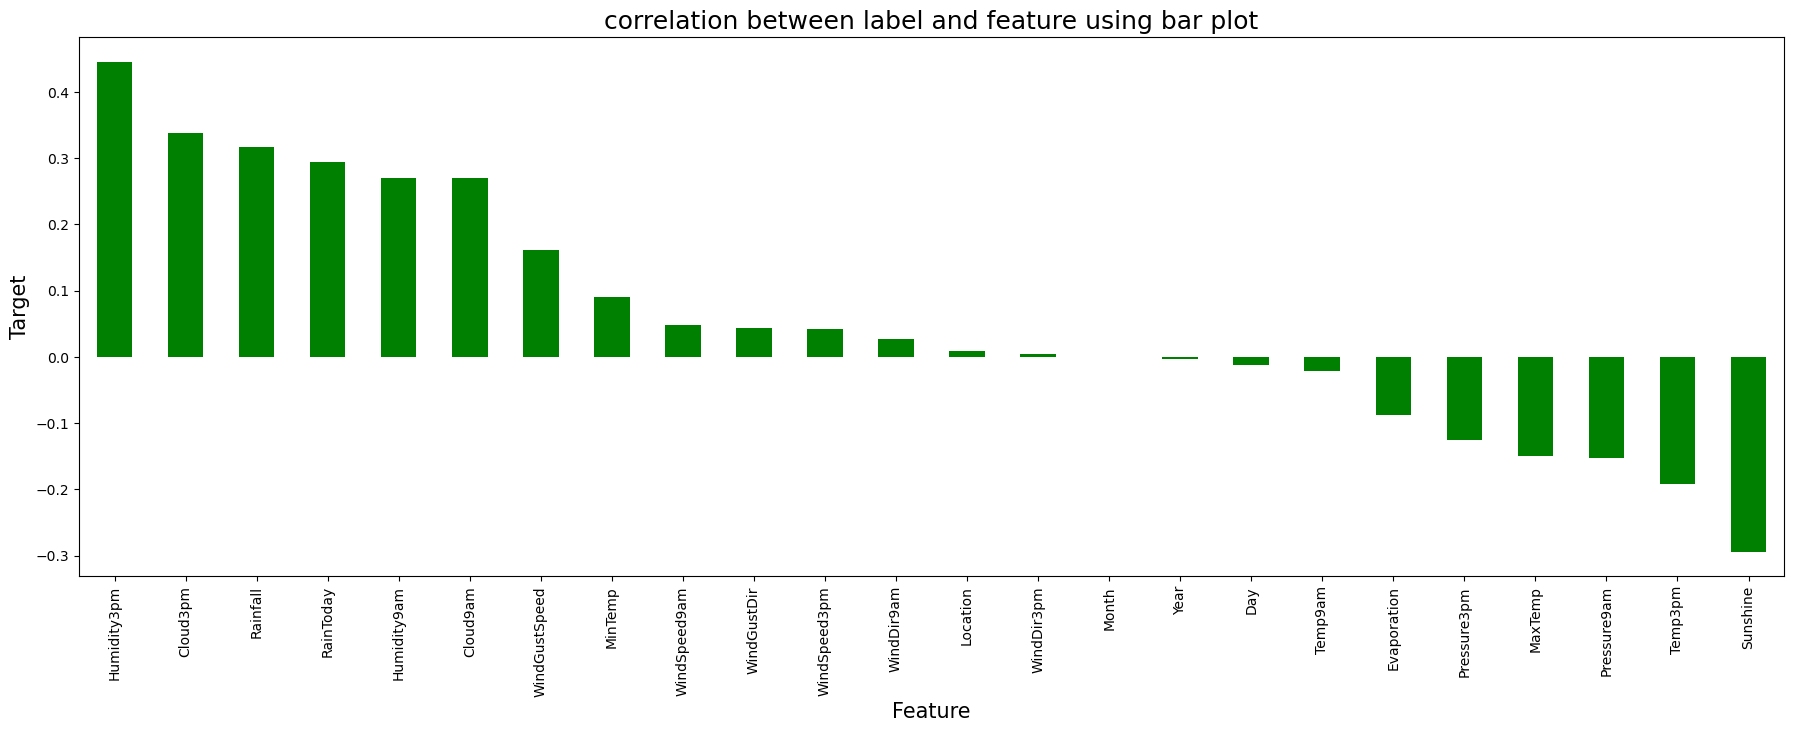

In [82]:
#Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [83]:
#Prediction for Rain-Tomorrow
#Data Pre-processing
#Splitting feature and label into x and y
x = new_df.drop("RainTomorrow", axis=1)
y = new_df["RainTomorrow"]

In [84]:
#Feature Scaling using Standard Scalarization
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.001029,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.543392,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.543392,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.543392,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.256468,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.543392,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.543392,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.543392,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.543392,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


In [85]:
#Checking VIF (Multicolinearity)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.591950,Location
1,8.763864,MinTemp
2,26.351310,MaxTemp
3,5.619158,Rainfall
4,1.505020,Evaporation
5,1.633523,Sunshine
6,1.621681,WindGustDir
7,2.158495,WindGustSpeed
8,1.397334,WindDir9am
9,1.493832,WindDir3pm


In [86]:
x.drop("Temp3pm",axis=1,inplace=True)


In [87]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.590914,Location
1,8.725374,MinTemp
2,9.618350,MaxTemp
3,5.616245,Rainfall
4,1.503205,Evaporation
5,1.632528,Sunshine
6,1.618586,WindGustDir
7,2.151185,WindGustSpeed
8,1.396733,WindDir9am
9,1.492748,WindDir3pm


In [88]:
x.drop("Pressure9am",axis=1,inplace=True)


In [89]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.590819,Location
1,8.576956,MinTemp
2,9.205668,MaxTemp
3,5.604577,Rainfall
4,1.491358,Evaporation
5,1.632164,Sunshine
6,1.603541,WindGustDir
7,2.132035,WindGustSpeed
8,1.373054,WindDir9am
9,1.426346,WindDir3pm


In [90]:
x.drop("Temp9am",axis=1,inplace=True)

In [91]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.589072,Location
1,4.530225,MinTemp
2,5.347522,MaxTemp
3,5.595027,Rainfall
4,1.485802,Evaporation
5,1.627447,Sunshine
6,1.601592,WindGustDir
7,2.090701,WindGustSpeed
8,1.372795,WindDir9am
9,1.426023,WindDir3pm


In [92]:
#Oversampling
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [94]:
y.value_counts()


0    6165
1    6165
Name: RainTomorrow, dtype: int64

In [95]:
#Finding the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9383617193836172  on Random_state  10


In [96]:
#Feature Importance
# Lets ckeck the feature importance using Random Forest Regressor

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Humidity3pm,0.165
Cloud3pm,0.097
Rainfall,0.066
Sunshine,0.058
WindGustSpeed,0.054
Humidity9am,0.053
Pressure3pm,0.048
Cloud9am,0.046
MinTemp,0.040


In [97]:
#Creating train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [99]:
#Modelling
#Logistic Regression Base Line Model
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7777777777777778
[[1431  387]
 [ 435 1446]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1818
           1       0.79      0.77      0.78      1881

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699



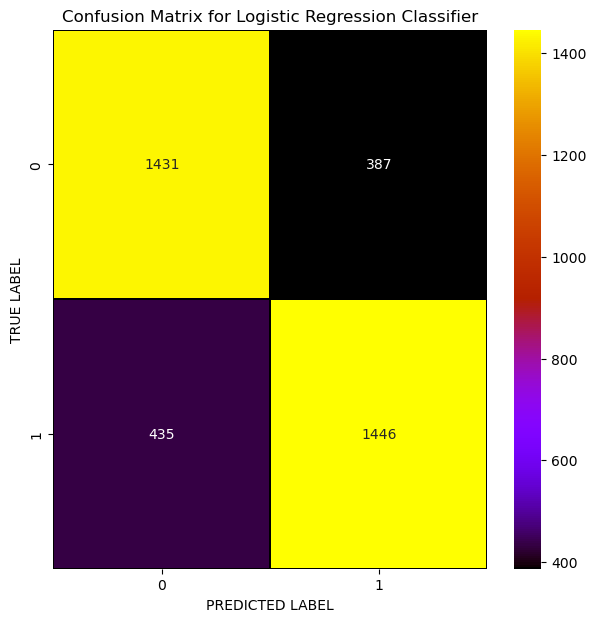

In [100]:
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [101]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9343065693430657
[[1701  117]
 [ 126 1755]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1818
           1       0.94      0.93      0.94      1881

    accuracy                           0.93      3699
   macro avg       0.93      0.93      0.93      3699
weighted avg       0.93      0.93      0.93      3699



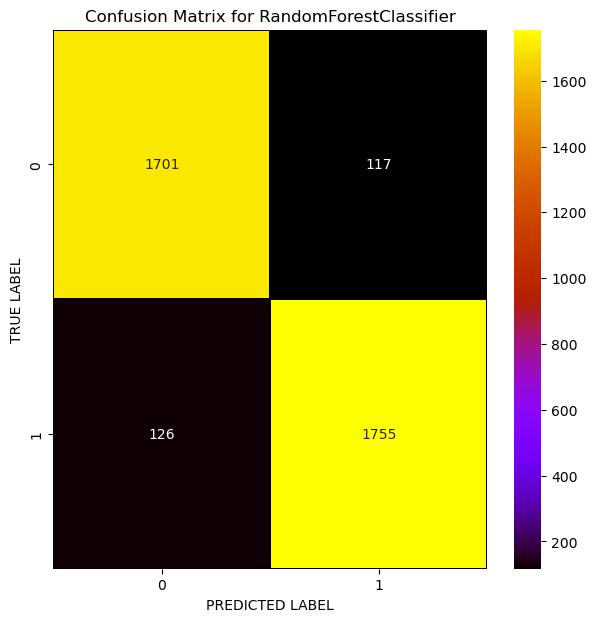

In [102]:
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [103]:
#AdaBoost Classifier
# Checking accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.8269802649364694
[[1490  328]
 [ 312 1569]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1818
           1       0.83      0.83      0.83      1881

    accuracy                           0.83      3699
   macro avg       0.83      0.83      0.83      3699
weighted avg       0.83      0.83      0.83      3699



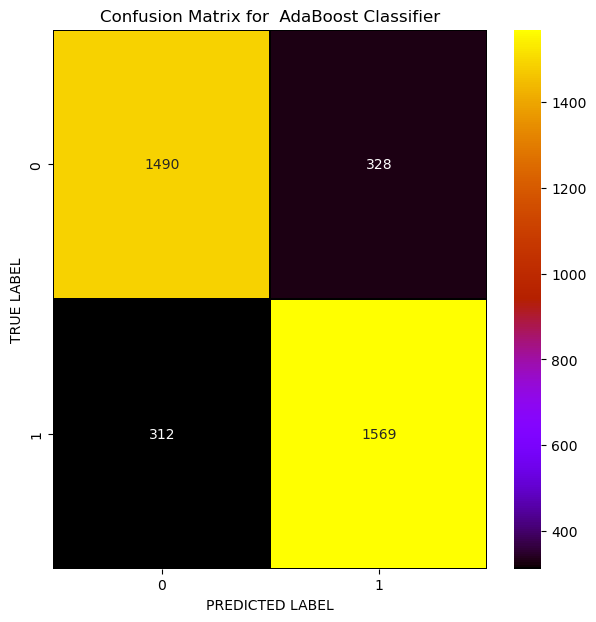

In [104]:
cm = confusion_matrix(y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

In [105]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8602324952689916
[[1577  241]
 [ 276 1605]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1818
           1       0.87      0.85      0.86      1881

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699



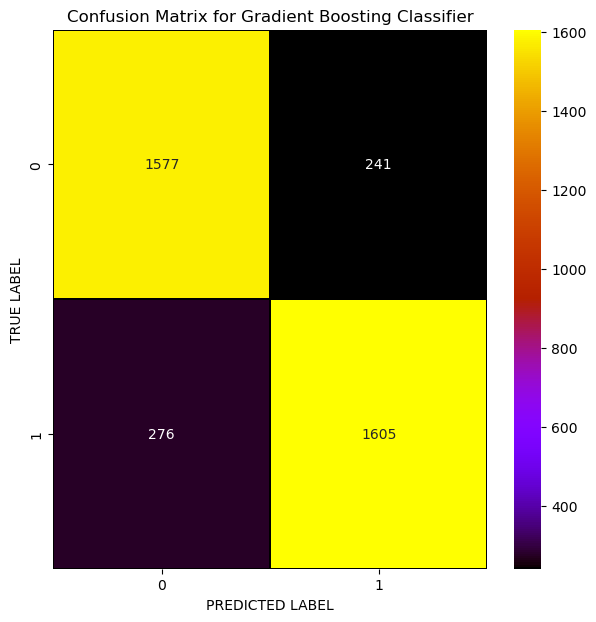

In [106]:
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [107]:
#XGB Classifier
# Checking accuracy for XGBClassifier
xgb = xgb(verbosity=0)
xgb.fit(x_train,y_train)

# Prediction
predxgb = xgb.predict(x_test)

print(accuracy_score(y_test, predxgb))
print(confusion_matrix(y_test, predxgb))
print(classification_report(y_test,predxgb))

0.9329548526628818
[[1709  109]
 [ 139 1742]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1818
           1       0.94      0.93      0.93      1881

    accuracy                           0.93      3699
   macro avg       0.93      0.93      0.93      3699
weighted avg       0.93      0.93      0.93      3699



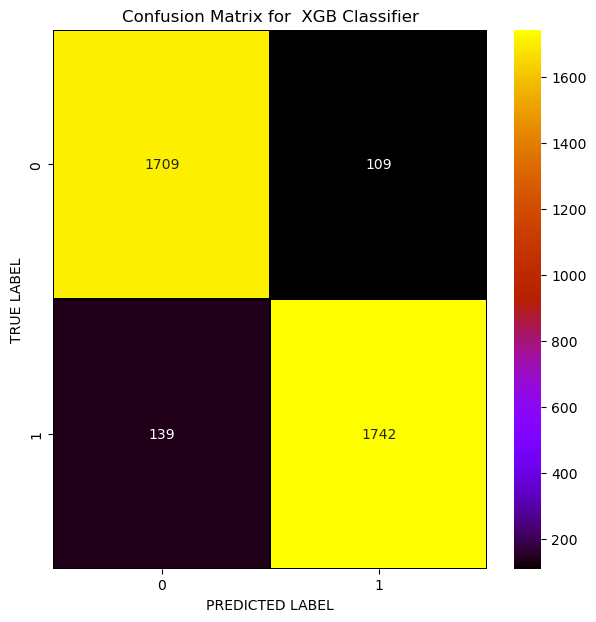

In [108]:
cm = confusion_matrix(y_test,predxgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

In [109]:
#Extra Trees Classifier
# Checking accuracy for ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(x_train,y_train)

# Prediction
predxtc = xtc.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.9421465260881319
[[1709  109]
 [ 105 1776]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1818
           1       0.94      0.94      0.94      1881

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



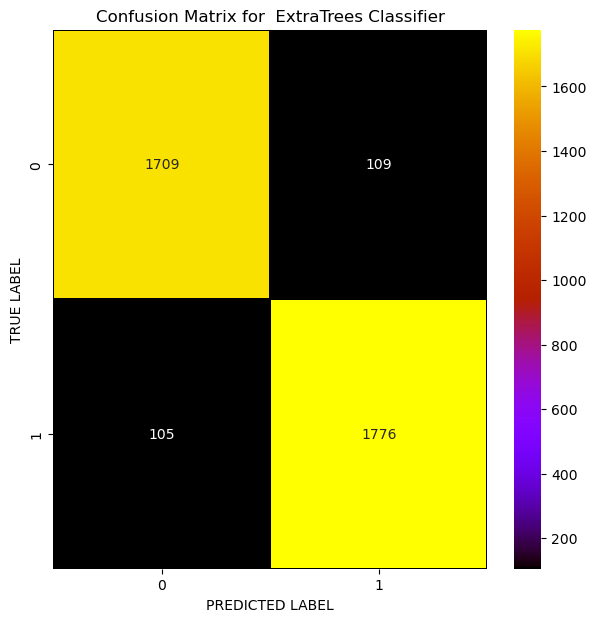

In [110]:
cm = confusion_matrix(y_test,predxtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

In [111]:
#Cross Validation Score

print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())
print('AdaBoosting Classifier:',cross_val_score(abc,x,y,cv=5).mean())
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())
print('XGB Classifier:',cross_val_score(xgb,x,y,cv=5).mean())
print('Extra Trees Classifier:',cross_val_score(xtc,x,y,cv=5).mean())

Logistic Regression: 0.716382806163828
Random Forest Classifier: 0.7944038929440389
AdaBoosting Classifier: 0.6639091646390917
Gradient Boosting Classifier: 0.6684509326845094
XGB Classifier: 0.6921330089213301
Extra Trees Classifier: 0.7974047039740471


In [112]:
'''We can see from the accuracy score of the models and after cross validation, ExtraTress is the best fit model.

'''

'We can see from the accuracy score of the models and after cross validation, ExtraTress is the best fit model.\n\n'

In [148]:
#HyperParameter Tuning of the best fit model
# ExtraTrees Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [149]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)


In [150]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [ ]:
GCV.fit(x_train,y_train)


In [ ]:
GCV.best_params_


In [145]:
Rainfall_Tomorrow=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
Rainfall_Tomorrow.fit(x_train, y_train)
pred = Rainfall_Tomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.99837793998378


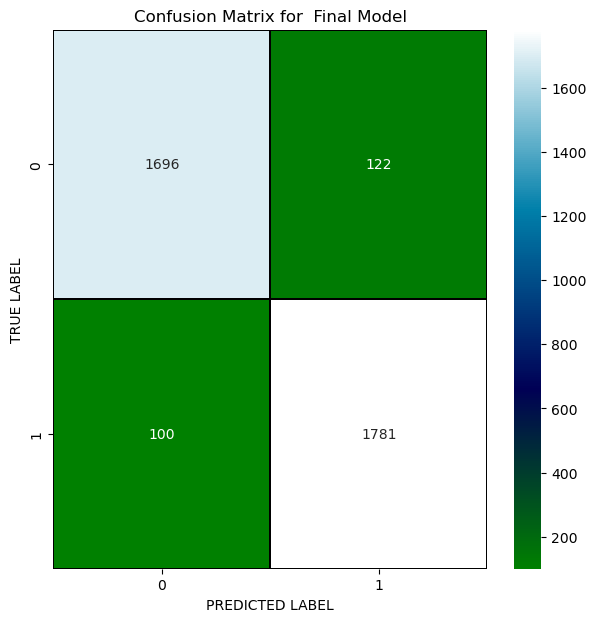

In [146]:
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show() 


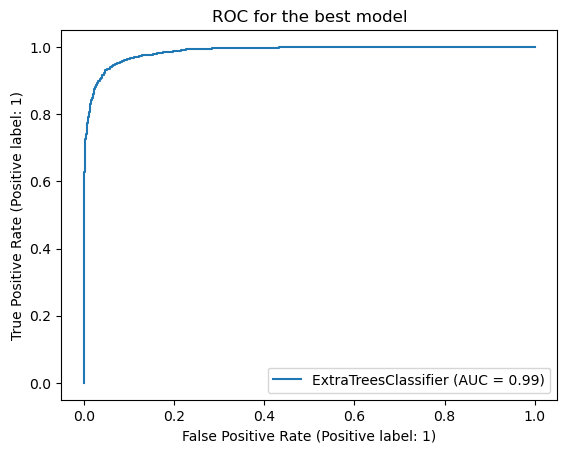

In [147]:
#Plotting ROC and Compare AUC for the best model
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Rainfall_Tomorrow, x_test, y_test)
plt.title("ROC for the best model")
plt.show()